In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

In [8]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method="ffill")

In [11]:
df_comp['market_value'] = df_comp.ftse

In [13]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [15]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

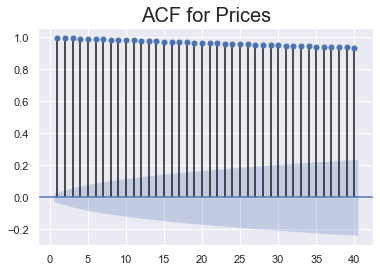

In [16]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF for Prices", size=20)
plt.show()

In [17]:
import warnings
warnings.filterwarnings("ignore")

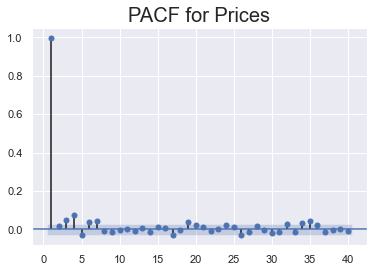

In [20]:
sgt.plot_pacf(df.market_value, zero=False, lags=40, alpha=0.05, method=("ols"))
plt.title("PACF for Prices", size=20)
plt.show()

In [23]:
model_ar1 = ARMA(df.market_value, order=(1,0)) # 1 - order, 0 - noise (residual, shock)
#p(n+1) = c + phi * p(n) + ksi
results_ar1 = model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.599
Method:                       css-mle   S.D. of innovations             59.258
Date:                Thu, 30 Apr 2020   AIC                          55251.198
Time:                        17:50:19   BIC                          55270.762
Sample:                    01-07-1994   HQIC                         55258.054
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5067.4707    486.503     10.416      0.000    4113.942    6021.000
ar.L1.market_value     0.9985      0.001   1298.545      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
model_ar2 = ARMA(df.market_value, order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Thu, 30 Apr 2020   AIC                          55251.742
Time:                        17:55:20   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    495.670     10.268      0.000    4118.145    6061.137
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4629           +0.0000j           58.4629            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
model_ar3 = ARMA(df.market_value, order=(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Thu, 30 Apr 2020   AIC                          55241.742
Time:                        17:59:29   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    520.356      9.781      0.000    4069.761    6109.521
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [27]:
model_ar4 = ARMA(df.market_value, order=(4,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Thu, 30 Apr 2020   AIC                          55217.130
Time:                        18:01:16   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    560.015      9.088      0.000    3992.032    6187.250
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

In [34]:
def llr
L1 = results_ar3.llf
L2 = results_ar4.llf
LR = 2*(L2-L1)
p = chi2.sf(LR, 1).round(3)

In [36]:
def llr_test(mod_1, mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR = 2*(L2-L1)
    return chi2.sf(LR, DF).round(3)

In [38]:
llr_test(model_ar1, model_ar2)

0.228

In [39]:
def llr_test2(L1, L2, DF=1):
    LR = 2*(L2-L1)
    return chi2.sf(LR, DF).round(3)

In [41]:
llr_test2(model_ar3.fit().llf, model_ar4.fit().llf)

0.0

In [42]:
model_ar5 = ARMA(df.market_value, order=(5,0))
results_ar5 = model_ar5.fit()
results_ar5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.343
Method:                       css-mle   S.D. of innovations             58.995
Date:                Thu, 30 Apr 2020   AIC                          55214.685
Time:                        18:22:35   BIC                          55260.335
Sample:                    01-07-1994   HQIC                         55230.681
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5031.9353    542.873      9.269      0.000    3967.923    6095.947
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value    -0.0293      0.020     -1.488      0.137      -0.068       0.009
ar.L3.market_value    -0.0232      0.020     -1.178      0.239      -0.062       0.015
ar.L4.market_value     0.1018      0.020      5.166      0.000       0.063       0.140
ar.L5.market_value    -0.0297      0.014     -2.106      0.035      -0.057      -0.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -2.0605           -0.0000j            2.0605           -0.5000
AR.3            0.4270           -2.0763j            2.1198           -0.2177
AR.4            0.4270           +2.0763j            2.1198            0.2177
AR.5            3.6287           -0.0000j            3.6287           -0.0000
-----------------------------------------------------------------------------
"""

In [43]:
llr_test(model_ar4, model_ar5)

0.035

In [45]:
model_ar6 = ARMA(df.market_value, order=(6,0))
results_ar6 = model_ar6.fit()
results_ar6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Thu, 30 Apr 2020   AIC                          55208.947
Time:                        18:24:15   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    565.304      9.003      0.000    3981.665    6197.617
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value    -0.0333      0.020     -1.687      0.092      -0.072       0.005
ar.L3.market_value    -0.0223      0.020     -1.134      0.257      -0.061       0.016
ar.L4.market_value     0.1029      0.020      5.227      0.000       0.064       0.141
ar.L5.market_value    -0.0682      0.020     -3.454      0.001      -0.107      -0.029
ar.L6.market_value     0.0393      0.014      2.785      0.005       0.012       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2           -1.6828           -0.0000j            1.6828           -0.5000
AR.3           -0.3031           -1.8985j            1.9226           -0.2752
AR.4           -0.3031           +1.8985j            1.9226            0.2752
AR.5            1.5114           -1.3426j            2.0216           -0.1156
AR.6            1.5114           +1.3426j            2.0216            0.1156
-----------------------------------------------------------------------------
"""

In [46]:
llr_test(model_ar5, model_ar6)

0.005

In [47]:
model_ar7 = ARMA(df.market_value, order=(7,0))
results_ar7 = model_ar7.fit()
results_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Thu, 30 Apr 2020   AIC                          55201.799
Time:                        18:25:23   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    589.587      8.633      0.000    3934.071    6245.211
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value    -0.0304      0.020     -1.540      0.124      -0.069       0.008
ar.L3.market_value    -0.0267      0.020     -1.353      0.176      -0.065       0.012
ar.L4.market_value     0.1038      0.020      5.279      0.000       0.065       0.142
ar.L5.market_value    -0.0668      0.020     -3.385      0.001      -0.105      -0.028
ar.L6.market_value    -0.0025      0.020     -0.127      0.899      -0.041       0.036
ar.L7.market_value     0.0427      0.014      3.026      0.002       0.015       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2            1.3301           -0.9296j            1.6228           -0.0971
AR.3            1.3301           +0.9296j            1.6228            0.0971
AR.4           -0.0400           -1.5870j            1.5875           -0.2540
AR.5           -0.0400           +1.5870j            1.5875            0.2540
AR.6           -1.7612           -0.6517j            1.8779           -0.4436
AR.7           -1.7612           +0.6517j            1.8779            0.4436
-----------------------------------------------------------------------------
"""

In [48]:
llr_test(model_ar6, model_ar7)

0.002

In [49]:
model_ar8 = ARMA(df.market_value, order=(8,0))
results_ar8 = model_ar8.fit()
results_ar8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Thu, 30 Apr 2020   AIC                          55203.478
Time:                        18:25:53   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    585.002      8.700      0.000    3943.059    6236.224
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value    -0.0304      0.020     -1.541      0.123      -0.069       0.008
ar.L3.market_value    -0.0272      0.020     -1.379      0.168      -0.066       0.011
ar.L4.market_value     0.1047      0.020      5.306      0.000       0.066       0.143
ar.L5.market_value    -0.0670      0.020     -3.395      0.001      -0.106      -0.028
ar.L6.market_value    -0.0028      0.020     -0.139      0.889      -0.041       0.036
ar.L7.market_value     0.0505      0.020      2.559      0.010       0.012       0.089
ar.L8.market_value    -0.0080      0.014     -0.567      0.571      -0.036       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.6223           -0.6323j            1.7412           -0.4409
AR.3           -1.6223           +0.6323j            1.7412            0.4409
AR.4           -0.0911           -1.5626j            1.5653           -0.2593
AR.5           -0.0911           +1.5626j            1.5653            0.2593
AR.6            1.3256           -1.0019j            1.6616           -0.1030
AR.7            1.3256           +1.0019j            1.6616            0.1030
AR.8            6.0863           -0.0000j            6.0863           -0.0000
-----------------------------------------------------------------------------
"""

In [50]:
llr_test(model_ar7, model_ar8)

0.571

In [51]:
df['res_price'] = results_ar7.resid

In [55]:
print(df.res_price.mean())
print(df.res_price.var())
print(df.res_price.std())

0.35224537442031306
4005.944669997778
63.292532497900396


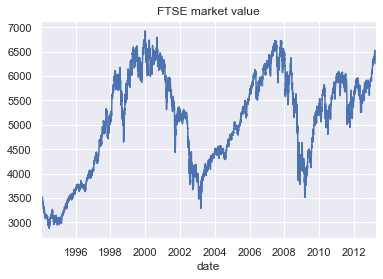

In [58]:
df.market_value.plot() 
plt.title("FTSE market value")
plt.show()

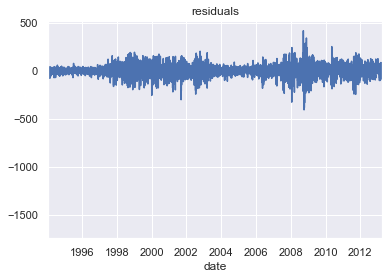

In [60]:
df.res_price.plot() 
plt.title("residuals")
plt.show()

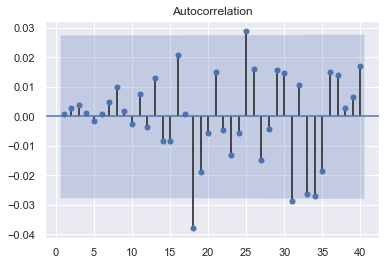

In [62]:
sgt.plot_acf(df.res_price, zero=False, lags=40);

How to check if we're dealing with stationary or non stationary points.

In [64]:
sts.adfuller(df.market_value) # augemnted Dickey Fuller test

(-1.904155141883686,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [65]:
sts.adfuller(df.res_price) 

(-76.07468882610272,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.4151233375)